# Homework 4

### CSCI 611, Spring 2024

Jesse Coulson


## Problem Statement
We are trying to analyze the wine dataset to find which dependent variables influence the target variable of wine quality the most. We will make 3 models after performing an eda to select features to use on a linear regressor, a linear regressor with regularization, and a polynomial regressor.

Subtasks:
 - Make visalizations and perform eda
 - Find performance metrics for each regression model, and suggest which model is best
 - Provide equation of model selected as best

In [1]:
#libraries needed for this ipynb
import seaborn as sns
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

## Reading in Data and Checking Format
 - Reading in data with read_csv from csv downlaoded from assignment page
 - Printing out head of dataframe to see sample of vars
 - Examine info on data types of dataframe

In [2]:
#read in df
df= pd.read_csv("wineQualityWhites.csv")

#print data to see data and format
print(df.head(), "\n")

#get info of types
df.info()


   Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.0              0.27         0.36            20.7   
1           2            6.3              0.30         0.34             1.6   
2           3            8.1              0.28         0.40             6.9   
3           4            7.2              0.23         0.32             8.5   
4           5            7.2              0.23         0.32             8.5   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49  

## Exploratory Data Analysis Exploratory Data Analysis
 - creating visualisations to analyze features
 - looking for features that will be useful for prediction
 - getting rid of variables that do not seem to have significant effect on quality of wine

## Creating Histograms of All the Variables 
- Seeing the distribution of values for each variable

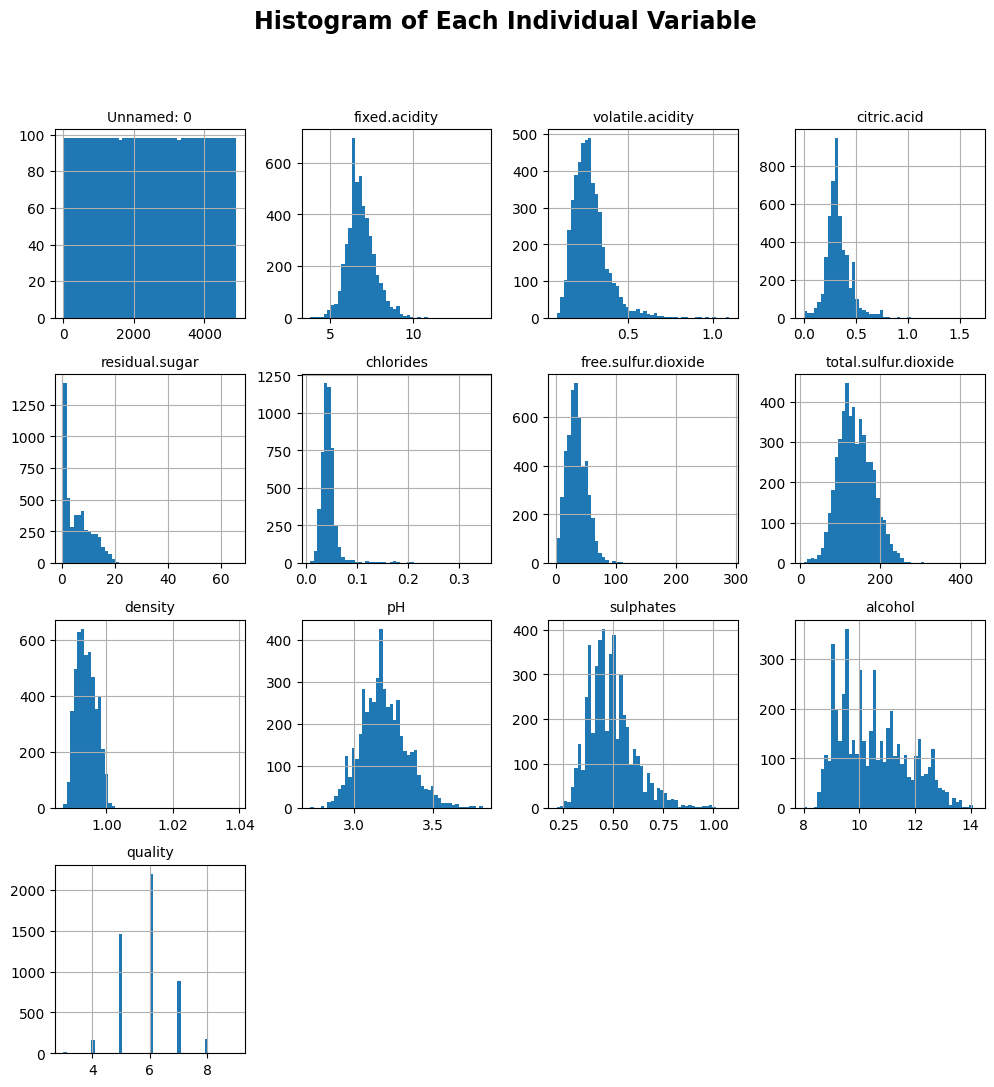

In [3]:
#histograms of the variables
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
#small plots side by side
df.hist(bins=50, figsize=(12, 12))
#title for histograms
plt.suptitle('Histogram of Each Individual Variable', fontsize=17, fontweight = "bold",verticalalignment='top', horizontalalignment='center')
plt.show()


### Histogram Conclusions
There are interesting insights to be found from these histograms. The first thing notciable is the scale of each variable. There is a very large variance in the scale, for example chlorides is mostly between 0 and .1 while the total sulfur dioxide is mostly between 0 and 200. To deal with this we will do some normalization later to put them on same scale. Another insight is that quality appears to be an ordinal variable and not continuous. This is weird since we are doing regressors for this assignment, this will still work but is very peculiar. It appears there are no quality values that are not whole numbers.

## Exploring Dataset Further
 - Checking the unique values and counts for quality since it appears the dataset is missing some of the numbers on the 1-10 scale
 - Also checking metrics for the dataframe and making sure no missing values

In [4]:
#distribution of quality variable is weird, will explore further
print("The unique score of target variable, quality")
print(df.quality.unique())

#individual count of each quality score
print("\nCount of each score:")
print(df['quality'].value_counts(), "\n")

#check for missing values in dataframe
nan_count = df.isna().sum()
print("Number of missing values in dataset: ")
print(nan_count)


#see statistics for each feature
print(df.describe(include='all'))

The unique score of target variable, quality
[6 5 7 8 4 3 9]

Count of each score:
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64 

Number of missing values in dataset: 
Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
        Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  \
count  4898.000000    4898.000000       4898.000000  4898.000000   
mean   2449.500000       6.854788          0.278241     0.334192   
std    1414.075139       0.843868          0.100795     0.121020   
min       1.000000       3.800000          0.080000     0.000000   
25%    1225.250000       6.300000          0.210000     0.270000   
50%    2449.500000  

### Further Dataset Exploration Conclusion
Checking the unique values of quality it appears there are no wines in this datset that are scored 1, 2, or 10. Exploring this further, the counts show most wines scored at a 6 and only 5 wines scored a 9. This is going to affect how good of a model we can create since there is not much variance for our regressor. I also checked for missing values which this dataset has none of. Then I explored the metrics of each variable such as mean and standard deviation and none of them stand out too much, but does further show the difference in scale between variables.

## Correlation Exploration
 - creating scatter matrix to see relationship betwen variables
 - making correlation matrix to see relationship between dependent variables and target of quality

<Figure size 640x480 with 0 Axes>

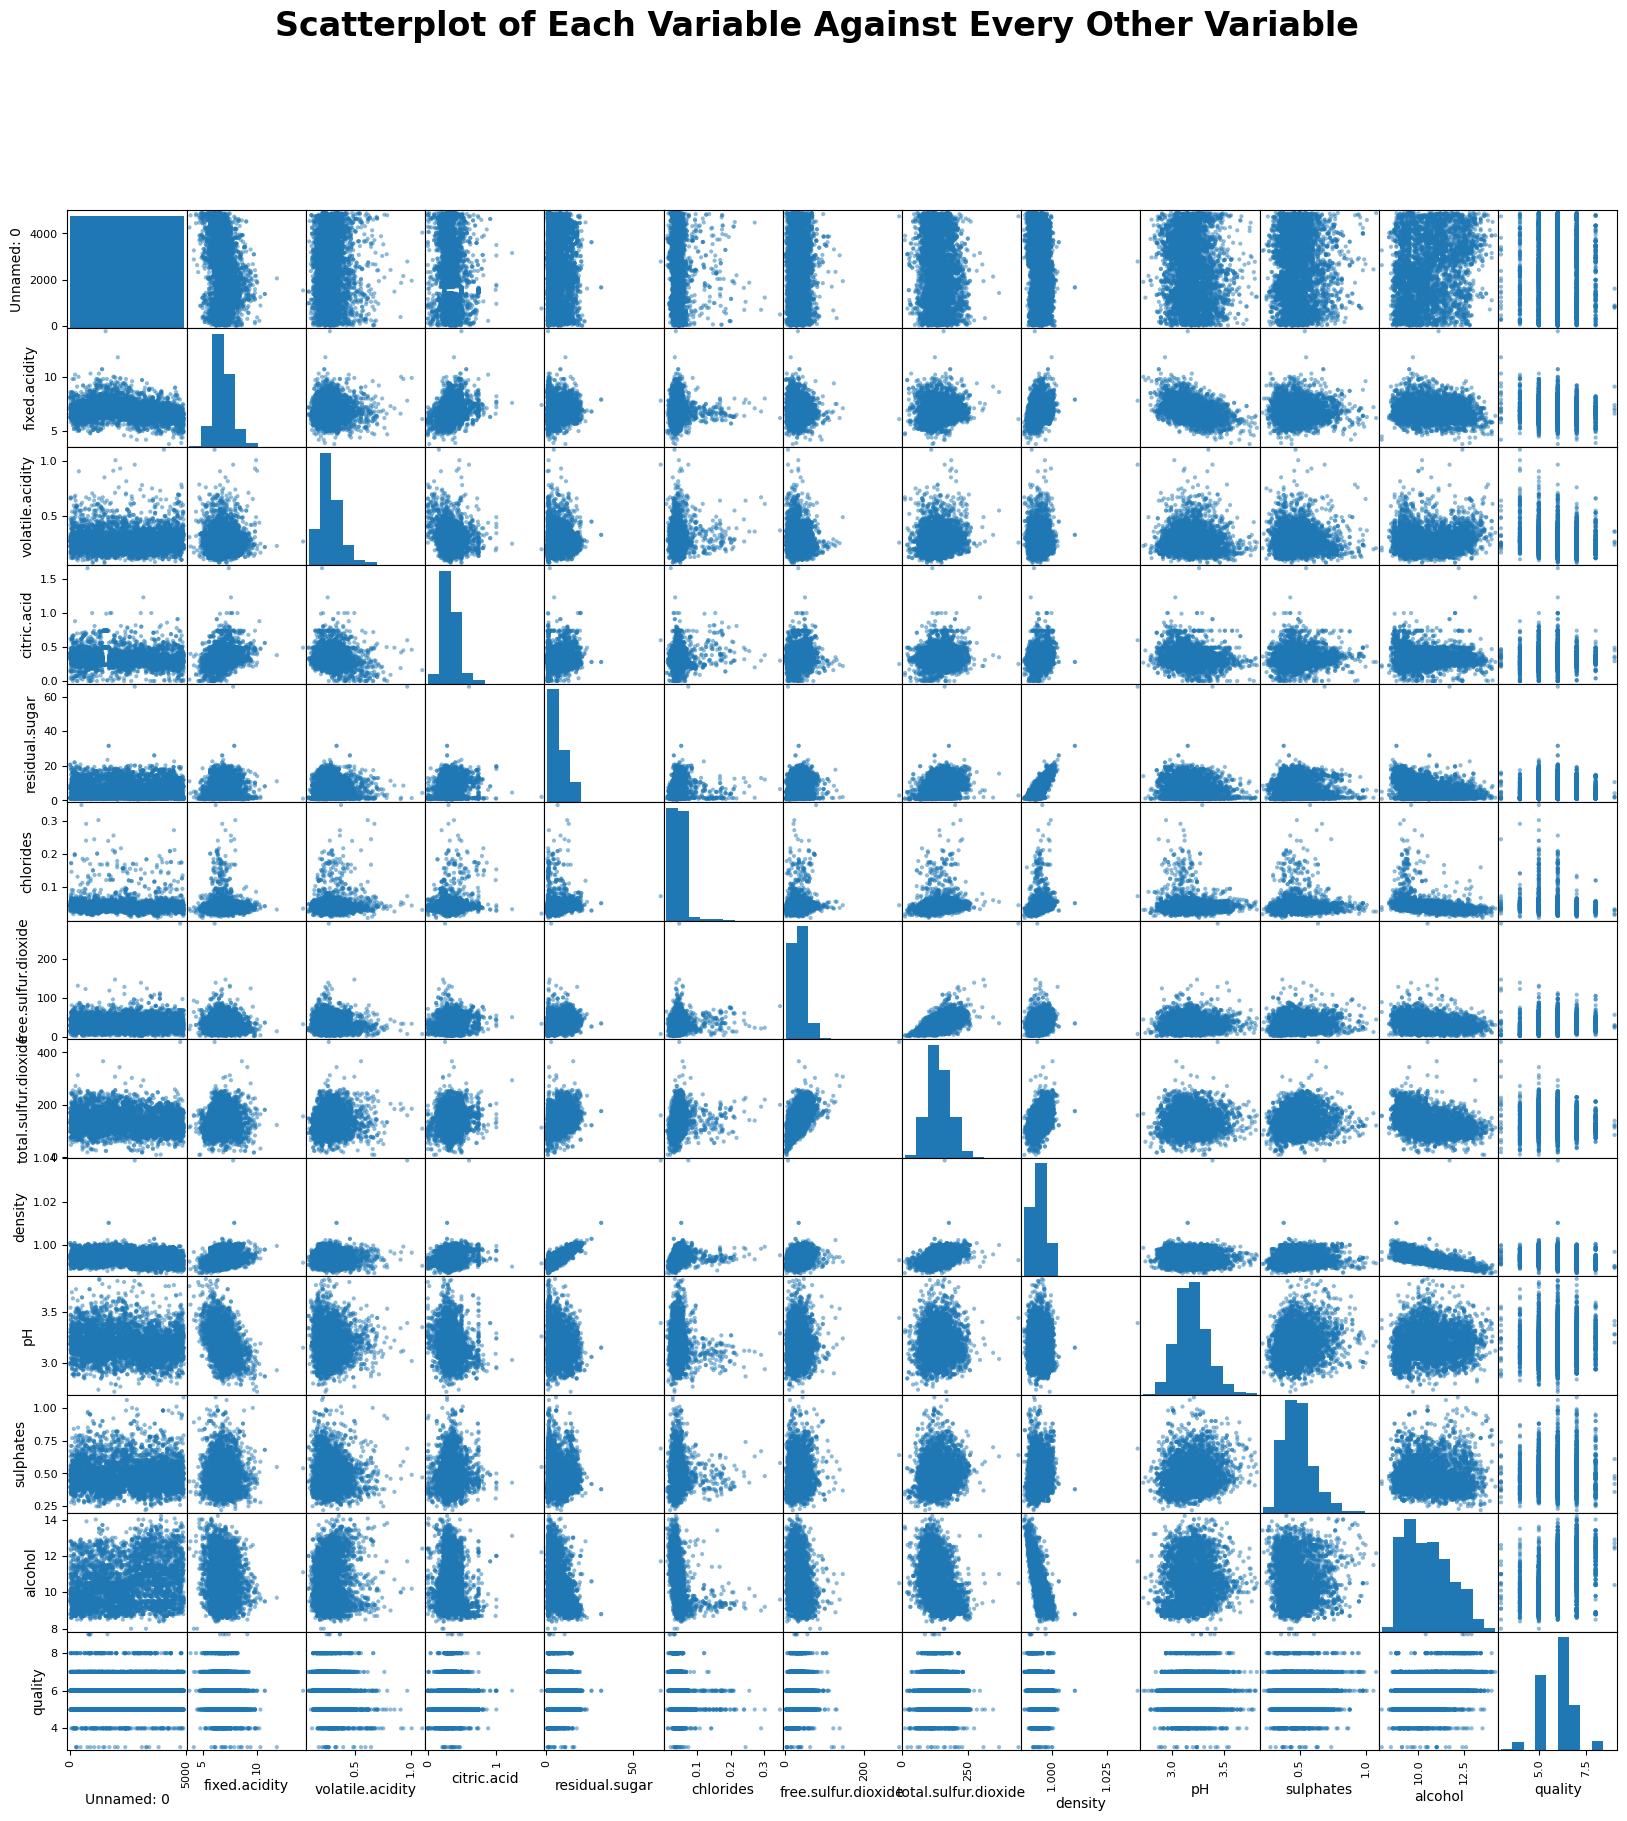

In [5]:
#scatter matrix to see correlations
from pandas.plotting import scatter_matrix
plt.clf()
scatter_matrix(df, figsize=(20, 20))
#title for scatter matrix
plt.suptitle('Scatterplot of Each Variable Against Every Other Variable', fontsize=24, fontweight = "bold",verticalalignment='top', horizontalalignment='center')
plt.show()



In [6]:
#seeing correlation between dependant vars and target
corr_matrix = df.corr(numeric_only= True)
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
Unnamed: 0              0.035763
free.sulfur.dioxide     0.008158
citric.acid            -0.009209
residual.sugar         -0.097577
fixed.acidity          -0.113663
total.sulfur.dioxide   -0.174737
volatile.acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

### Correlation Exploration Conclusion
From the scatter matrix we can see that variables I will explore for combination are total sulfer dioxide and free sulfur dioxide. Another two variables I will try to combine are volatile acidity and fixed acidity. These variables have obvious correlation from the scatter plots. From the correlation matrix for quality we can see variables such as alcohol and density are very significantly correlated to quality while others like citric acid and residual sugar seem to ahve little impact.

## Feature Engineering Based Off Correlation Graphs and Analysis

In [7]:
#used visualzation as indicator of which variables might be realted for combination
#explored multiple different variables until found high correlation between combining these two combination variables were most promising I found
#I interpret the result of total sulfer - free sulfer as total non free sulfer
df["non_free_sulfur"] = df["total.sulfur.dioxide"] -df["free.sulfur.dioxide"]

#checking correlation of new var with quality
print(df['non_free_sulfur'].corr(df['quality']))


#fixed acidity and volatile acidity need to be scaled for combination
scaler = MinMaxScaler()


temp_fixed_acidity= scaler.fit_transform(df[['fixed.acidity']])
temp_volatile_acidity= scaler.fit_transform(df[['volatile.acidity']])


#interpret fixed + volatile acidity as total aciditty
df["scaled_total_acidity"] = temp_fixed_acidity + temp_volatile_acidity

print(df['scaled_total_acidity'].corr(df['quality']))




-0.21786775964740793
-0.2251408220384966


### Feature Engineering Conclusion
I created two new variables non free sulfur and scaled total acidity. Both of these new combination variables have greater correlation with quality than either of their parts. For total acidity I had to scale it because volatile and fixed acidity are on such different scales, the average for volatile is .27 while the average for fixed is 6.85. When I combine these without scaling its about -.17 correlation, but with scaling it becomes -.22.

## Making visualizations of promising variables
 - Exploring anything above |.2| correlation threshold
     - density, non_free_sulfur, total_acidity, alcohol, chlorides
 - Showing boxplots and barplots

### Visualizing Density

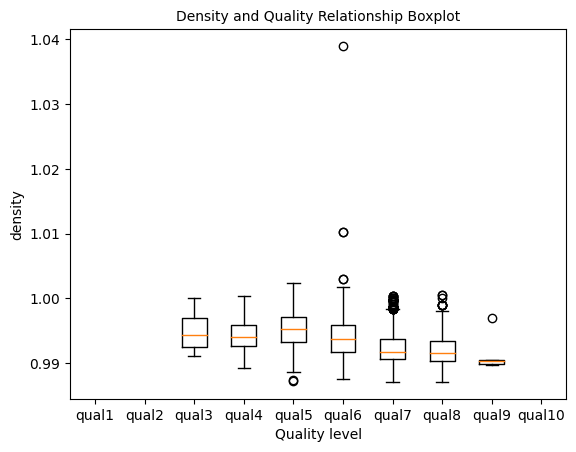

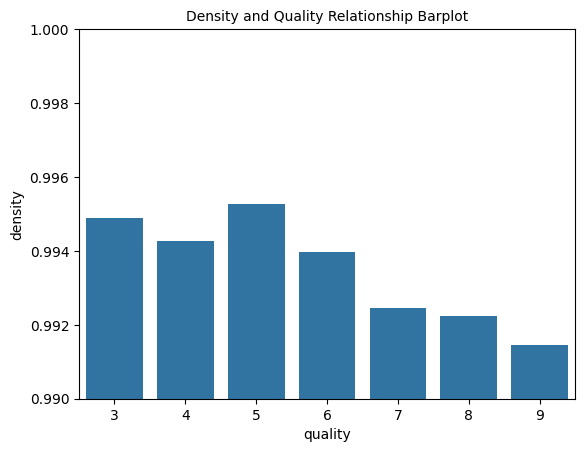

<Figure size 640x480 with 0 Axes>

In [8]:
quality_list = []
#grab densities at each quality level
for i in range(1,11):
    quality_list.append(df[df['quality'] == i]['density'])

#making the boxplots
plt.boxplot([quality for quality in quality_list], labels=[f"qual{i}" for i in range(1,11)]) #plot list of boxplots
plt.xlabel('Quality level')
plt.ylabel('density')
plt.title('Density and Quality Relationship Boxplot')
plt.show()
plt.clf()

#making barplots
sns.barplot(df, x='quality', y='density', errorbar = None)
plt.ylim(.99, 1)
plt.title('Density and Quality Relationship Barplot')
plt.show()
plt.clf()

### Visualizing Non Free Sulfur

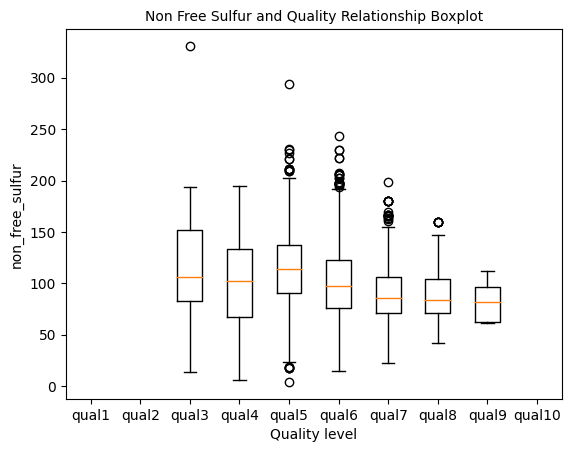

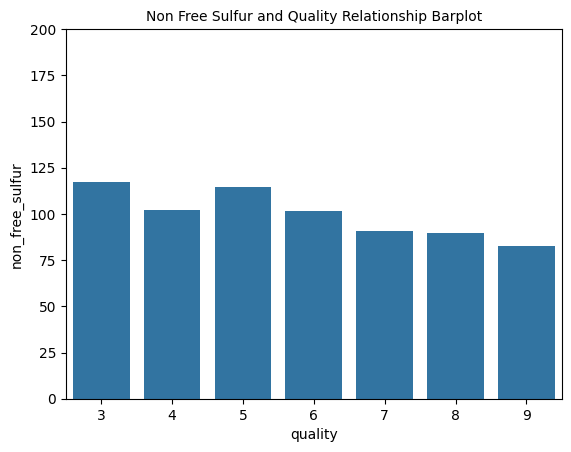

<Figure size 640x480 with 0 Axes>

In [9]:
quality_list = []
#grab non_free_sulfur at each quality level
for i in range(1,11):
    quality_list.append(df[df['quality'] == i]['non_free_sulfur'])
    
plt.boxplot([quality for quality in quality_list], labels=[f"qual{i}" for i in range(1,11)])
plt.xlabel('Quality level')
plt.ylabel('non_free_sulfur')
plt.title('Non Free Sulfur and Quality Relationship Boxplot')
plt.show()
plt.clf()

sns.barplot(df, x='quality', y='non_free_sulfur', errorbar = None)
plt.title('Non Free Sulfur and Quality Relationship Barplot')
plt.ylim(0,200)
plt.show()
plt.clf()

### Visualizing Scaled Total Acidity

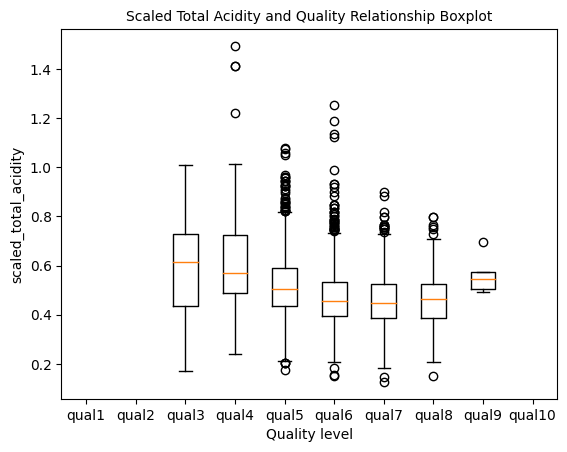

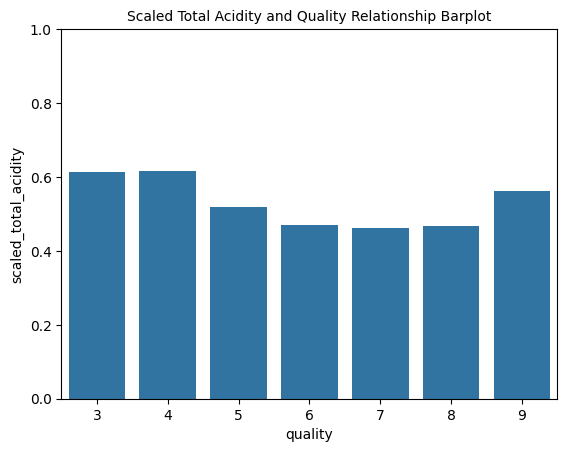

<Figure size 640x480 with 0 Axes>

In [10]:
quality_list = []
#grab total acidity at each quality level
for i in range(1,11):
    quality_list.append(df[df['quality'] == i]['scaled_total_acidity'])
    
plt.boxplot([quality for quality in quality_list], labels=[f"qual{i}" for i in range(1,11)])
plt.xlabel('Quality level')
plt.ylabel('scaled_total_acidity')
plt.title('Scaled Total Acidity and Quality Relationship Boxplot')
plt.show()
plt.clf()

sns.barplot(df, x='quality', y='scaled_total_acidity', errorbar = None)
plt.title('Scaled Total Acidity and Quality Relationship Barplot')
plt.ylim(0,1)
plt.show()
plt.clf()

### Exploring Alcohol Variable

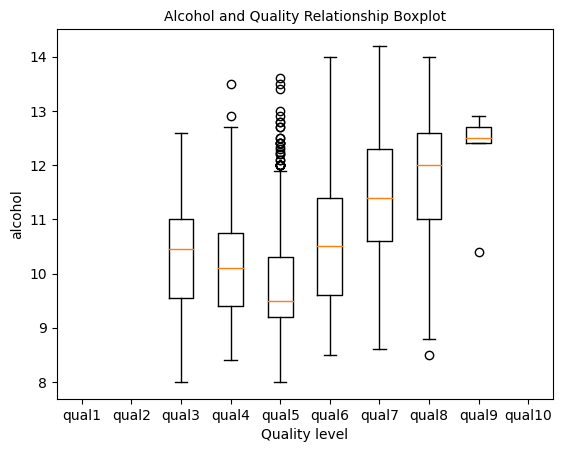

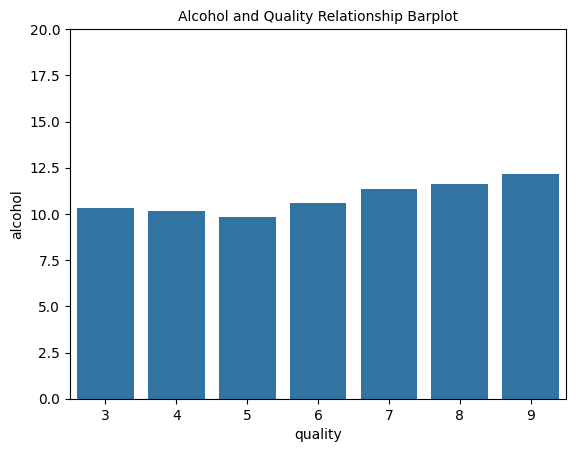

<Figure size 640x480 with 0 Axes>

In [11]:
quality_list = []
#grab alcohol level at each quality level
for i in range(1,11):
    quality_list.append(df[df['quality'] == i]['alcohol'])
    
plt.boxplot([quality for quality in quality_list], labels=[f"qual{i}" for i in range(1,11)])
plt.xlabel('Quality level')
plt.ylabel('alcohol')
plt.title('Alcohol and Quality Relationship Boxplot')
plt.show()
plt.clf()

sns.barplot(df, x='quality', y='alcohol', errorbar = None)
plt.title('Alcohol and Quality Relationship Barplot')
plt.ylim(0,20)
plt.show()
plt.clf()

### Visualizing Chlorides Variable

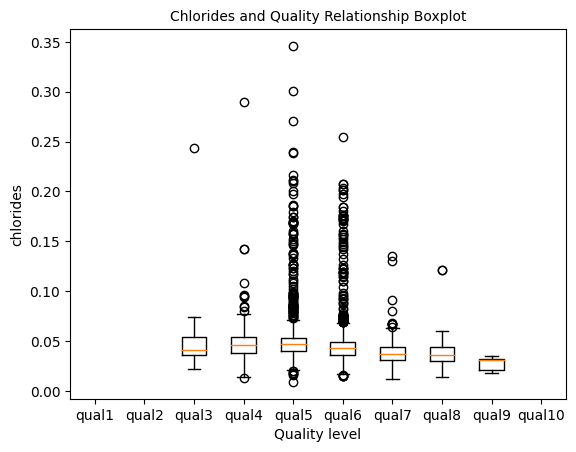

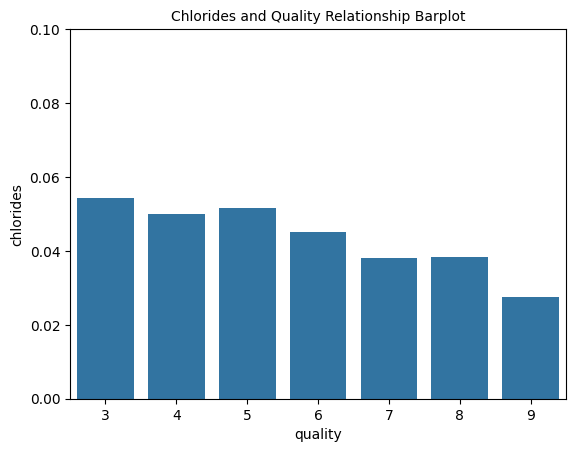

<Figure size 640x480 with 0 Axes>

In [12]:
quality_list = []
#grab Chloride level at each quality level
for i in range(1,11):
    quality_list.append(df[df['quality'] == i]['chlorides'])
    
plt.boxplot([quality for quality in quality_list], labels=[f"qual{i}" for i in range(1,11)])
plt.xlabel('Quality level')
plt.ylabel('chlorides')
plt.title('Chlorides and Quality Relationship Boxplot')
plt.show()
plt.clf()

sns.barplot(df, x='quality', y='chlorides', errorbar = None)
plt.title('Chlorides and Quality Relationship Barplot')
plt.ylim(0,.1)
plt.show()
plt.clf()



### Visualization of Promising Variables Conclusion
The bokxplots are showing the means and the outliers as they relate to the quality variable. The barplots are showing the mean as it relates to each quality, similar to the boxplot but more clear on the trends. From these visualizations you can see that these varibales generally have a trend that relates to quality. From the boxplots you can see most of the variables have a llot of outliers on quality of 5 and quality fo 6. From the general trends you can see if there is a general relationship between the variables and quality. For example for alcohol there is a general trend up after quality 5, this is implying that the higher the alcohol after quality 5 the higher the quality will be. For a downward correlation you can see for non free sulfur and chlorides that generally as the non free sulfur goes down, the quality goes up. All of these variables seem to have some significance in trned, not complete randomization in means across the qualities so I will use these variables for the models

# Using kfold Cross Validation for Initial Model Performance
 - Splitting the data into training and testing
 - Normalizing all the dependant variables using minmaxscaler before use in all models since the scales are so different as found out in previous exploration
 - For analyzing the models I will use kfold cross validation with metrics of mean squared error, mean absolute error, and r squared

In [13]:
#non_free_sulfur, scaled_total_acidity, alcohol, chlorides, density are variables being used
X = df[['non_free_sulfur', 'scaled_total_acidity', 'alcohol', 'chlorides', 'density']] 
y = df['quality'] #get target feature

#splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(
   X, y, random_state=42)

#scaling all values between 0 and 1
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

## Linear Regressor Model
 - For first linear regressor I will use SGDClassifier

In [14]:
#first model using is Stochastic Gradient Descent Regressor
SGD_model = SGDRegressor()


score_list = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

scores = cross_validate(SGD_model, X_train_norm, y_train, scoring = score_list, cv=5, return_train_score = True)

print("----SGDRegressor kfold----")
print("R squared for each fold:")
#showing metrics for each fold
for i, fold_r2 in enumerate(scores["test_r2"]):
    print(f"Fold {i} rsquared:",fold_r2)
print()
    

print("Mean squared error for each fold:")
#need to write test_ before scoring function to see score on test fold instead of train fold
for i, fold_r2 in enumerate(scores["test_neg_mean_squared_error"]):#have to use neg because only neg is in scikit learn scorer
    print(f"Fold {i} mean squared error:", -1*fold_r2)
print()    

print("Mean absolute error for each fold:")
for i, fold_r2 in enumerate(scores["test_neg_mean_absolute_error"]):
    print(f"Fold {i} mean absolute error:", -1*fold_r2)

----SGDRegressor kfold----
R squared for each fold:
Fold 0 rsquared: 0.19203809696508523
Fold 1 rsquared: 0.1579730238032513
Fold 2 rsquared: 0.19616176331220525
Fold 3 rsquared: 0.191323078661765
Fold 4 rsquared: 0.1769662697269544

Mean squared error for each fold:
Fold 0 mean squared error: 0.575723239024244
Fold 1 mean squared error: 0.7104433594490868
Fold 2 mean squared error: 0.6416510665999001
Fold 3 mean squared error: 0.6451091068320947
Fold 4 mean squared error: 0.6387449723724582

Mean absolute error for each fold:
Fold 0 mean absolute error: 0.6123999169417953
Fold 1 mean absolute error: 0.6521501031219333
Fold 2 mean absolute error: 0.6258517726359429
Fold 3 mean absolute error: 0.6386485802897082
Fold 4 mean absolute error: 0.6173590364563709


## Regularized Linear Regressor Model
 - For the regularized linear regressor model I will use ridge regression with Ridge()

In [15]:
#model using is Ridge regressor
ridge_model = Ridge() #default alpha is 1.0


score_list = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

scores = cross_validate(ridge_model, X_train_norm, y_train, scoring = score_list, cv=5, return_train_score = True)

print("----Ridge kfold----")
print("R squared for each fold:")
#showing metrics for each fold
for i, fold_r2 in enumerate(scores["test_r2"]):
    print(f"Fold {i} rsquared:",fold_r2)
print()
    

print("Mean squared error for each fold:")
for i, fold_r2 in enumerate(scores["test_neg_mean_squared_error"]):
    print(f"Fold {i} mean squared error:", -1*fold_r2)
print()    

print("Mean absolute error for each fold:")
for i, fold_r2 in enumerate(scores["test_neg_mean_absolute_error"]):
    print(f"Fold {i} mean absolute error:", -1*fold_r2)

----Ridge kfold----
R squared for each fold:
Fold 0 rsquared: 0.25056169981474685
Fold 1 rsquared: 0.22034396649659038
Fold 2 rsquared: 0.2824343909062803
Fold 3 rsquared: 0.25955387800936247
Fold 4 rsquared: 0.21741278062659208

Mean squared error for each fold:
Fold 0 mean squared error: 0.5340215225628434
Fold 1 mean squared error: 0.6578191285019912
Fold 2 mean squared error: 0.5727853160202664
Fold 3 mean squared error: 0.5906790756736336
Fold 4 mean squared error: 0.6073550006897903

Mean absolute error for each fold:
Fold 0 mean absolute error: 0.5748509698923759
Fold 1 mean absolute error: 0.6246027259632294
Fold 2 mean absolute error: 0.5888651750411525
Fold 3 mean absolute error: 0.6065965128825721
Fold 4 mean absolute error: 0.5947427059569621


## Polynomial Regressor Model
 - Doing polynomial regession by making features polynomial

In [16]:
#polynomial degree 2 has best performance
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_train_poly = poly_features.fit_transform(X_train_norm)
X_test_poly = poly_features.transform(X_test_norm)

#model using Linear regression with polynomial features
poly_model = LinearRegression()



score_list = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(ridge_model, X_train_poly, y_train, scoring = score_list, cv=5, return_train_score = True)

print("----Polynomial kfold----")
print("R squared for each fold:")
#showing metrics for each fold
for i, fold_r2 in enumerate(scores["test_r2"]):
    print(f"Fold {i} rsquared:",fold_r2)
print()
    

print("Mean squared error for each fold:")
for i, fold_r2 in enumerate(scores["test_neg_mean_squared_error"]):
    print(f"Fold {i} mean squared error:", -1*fold_r2)
print()    

print("Mean absolute error for each fold:")
for i, fold_r2 in enumerate(scores["test_neg_mean_absolute_error"]):
    print(f"Fold {i} mean absolute error:", -1*fold_r2)

----Polynomial kfold----
R squared for each fold:
Fold 0 rsquared: 0.2559353469350554
Fold 1 rsquared: 0.23476322982865128
Fold 2 rsquared: 0.2935979905148125
Fold 3 rsquared: 0.2686072128094965
Fold 4 rsquared: 0.2254476564242336

Mean squared error for each fold:
Fold 0 mean squared error: 0.5301924638982498
Fold 1 mean squared error: 0.6456531644984618
Fold 2 mean squared error: 0.563874150478522
Fold 3 mean squared error: 0.5834569223356832
Fold 4 mean squared error: 0.6011192459076892

Mean absolute error for each fold:
Fold 0 mean absolute error: 0.5745582272701931
Fold 1 mean absolute error: 0.6213104506102222
Fold 2 mean absolute error: 0.5850579620624154
Fold 3 mean absolute error: 0.604320172050364
Fold 4 mean absolute error: 0.5943994896966185


### kfold Results
From the kfold cross validation it appears so far that the best performing model is the ridge regression. The performance of each fold in each model seems to be close to each other so the dataset seems to be consistently split. I will now use test data to get final results and make conclusions about the metrics of each model

## Using Test Set and Final Results
 - will get metrics of mean absolute error, mean squared error, and rsquared from the test set
 - Analyze the metrics to see best peroforming model to find equation of for later
 - Using default hyperparameters because we haven't gone over grid search and I did mess with different params like alpha for ridge but it did not perform better than the scikit learn default so I will stick with that

In [17]:
#SGD on test set
SGD_model.fit(X_train_norm, y_train)
y_pred = SGD_model.predict(X_test_norm)

print("SGD regression metrics:")
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))
print("Mean squared error:",mean_squared_error(y_test, y_pred))
print("R squared:",r2_score(y_test, y_pred))
print("\n------------")

#Ridge ression on test set
ridge_model = Ridge()
ridge_model.fit(X_train_norm, y_train)
y_pred = ridge_model.predict(X_test_norm)


print("Ridge regression metrics:")
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))
print("Mean squared error:",mean_squared_error(y_test, y_pred))
print("R squared:",r2_score(y_test, y_pred))
print("\n------------")

#polynomial regression on test set
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_norm)
X_test_poly = poly_features.transform(X_test_norm)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred = poly_model.predict(X_test_poly)

print("Polynomial regression metrics:")
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))
print("Mean squared error:",mean_squared_error(y_test, y_pred))
print("R squared:",r2_score(y_test, y_pred))

SGD regression metrics:
Mean absolute error: 0.625603880357978
Mean squared error: 0.6215620039864226
R squared: 0.19936799482905032

------------
Ridge regression metrics:
Mean absolute error: 0.5994323841751759
Mean squared error: 0.5817261493920306
R squared: 0.25068043017267394

------------
Polynomial regression metrics:
Mean absolute error: 0.5998317788642096
Mean squared error: 0.5865259206108507
R squared: 0.24449786040386656


### Final Conclusions on Model Performance
It appears from the metrics that the best performing model is the Ridge regression. To analyze the metrics mean squared error means average of distance between all the predicted values and the actual values squared, the mean absolute error is the average of distance between the absolute value of the difference between all predicted values and actual values , and rsquared is a metric that basically compared the variance in predictions / the variance naturally in the model. So from the best performing model it has the lowest mean absolute error and mean squared error. The number is .599  and .581 which means most of the predictions are less than 1 away from the actual quality of the wine. The R squared shows that there is a significance in the model, the closer it is to one the more the model is explaining variance in the dataset. Having the rsquared be .25 means the model predicts some of the relationship between the dependent and target variable, because an rsquared of 0 would mean it predicts onone of it. The other regressors are fairly close wtih ridge regression being almost exactly the same but polynomial is very slightly better. Even though Ridge and Polynomial have almost identical results, the MSE is .05 smaller for ridge and the r squared is .06 larger for ridge. In conclusion our best performing model Ridge Regression.

## Model Equation for Best Regression(Ridge)

In [18]:
ridge_model.intercept_, ridge_model.coef_

(5.252592992754628,
 array([-0.04411283, -2.27406316,  2.37304622, -0.36102167,  2.36533587]))

## Equation:

\begin{equation*}
\hat{y} = 5.25 -0.04 \times \mathbf{X}_1  - 2.27\times \mathbf{X}_2 + 2.37\times \mathbf{X}_3 -0.36\times \mathbf{X}_4 + 2.36 \times \mathbf{X}_5
\end{equation*}

### Or with feature names:
\begin{equation*}
\hat{y} = 5.25 -0.04 \times \textbf{non free sulfur} - 2.27 \times \textbf{scaled total acidity} + 2.37\times \textbf{alcohol} -0.36\times \textbf{chlorides} + 2.36\times \textbf{density}
\end{equation*}

#### I had to remove the underscores inside the feature names because it would not be able to render as pdf if that was there.